# Exploring NYC Housing Costs, An Introduction to Python for Data Science

## This demo uses a data set available from NYC Open Data (https://nycopendata.socrata.com/) to showcase how to use python for data science. In particular, it will be focused on loading tabular data, data munging, plotting, calculating descriptive statistics, modeling data, and working with time series data

In [ ]:
# Importing required libraries

%matplotlib inline  
import os
import matplotlib.pyplot as plt
import datetime
from os import listdir
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

###  1) Introducing Data Frames (Importing, Indexing)

In [21]:
# Loading in a single Excel file into a data frame using pandas. This is just one of the files
# we will need to reed in.  Let's read it in as a test. Note: file has a 4 line header.

dataTest = pd.read_excel('Datafiles/2009_brooklyn.xls', header=4)

In [22]:
# Displaying lines from data frame (note: columns are labeled from data in file)

dataTest

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6360,75,,A5,72 BAY 10 STREET,11228,1,0,1,2513,1428,1930,1,A5,155356,2009-08-11
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6360,157,,A5,36 BAY 10 STREET,11228,1,0,1,1547,1428,1930,1,A5,505000,2009-03-05
2,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,2,,A5,1649 BENSON AVENUE,11214,1,0,1,1638,972,1930,1,A5,0,2009-10-23
3,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,8,,A1,1631 BENSON AVENUE,11214,1,0,1,2688,1367,1930,1,A1,440000,2009-05-26
4,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,8,,A1,1631 BENSON AVENUE,11214,1,0,1,2688,1367,1930,1,A1,410000,2009-03-11
5,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,72,,A5,68 BAY 14 STREET,11214,1,0,1,1950,972,1950,1,A5,455000,2009-08-21
6,3,BATH BEACH,01 ONE FAMILY HOMES,1,6365,43,,S1,1684 86 STREET,11214,1,1,2,1833,1656,1931,1,S1,725000,2009-03-20
7,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,20,,A1,51 BAY 28 STREET,11214,1,0,1,2900,1512,1901,1,A1,0,2009-04-07
8,3,BATH BEACH,01 ONE FAMILY HOMES,1,6395,15,,A9,147 BAY 10 STREET,11228,1,0,1,1933,2391,1925,1,A9,0,2009-10-07
9,3,BATH BEACH,01 ONE FAMILY HOMES,1,6397,6,,A1,1611 BATH AVENUE,11214,1,0,1,2250,1380,1905,1,A1,725000,2009-12-29


In [23]:
# There are multiple ways to index into a pandas data frame.
# You can index an entire column using the dot notation.

dataTest.ADDRESS  # also can use dataTest['ADDRESS']

0        72 BAY 10 STREET                         
1        36 BAY 10 STREET                         
2        1649 BENSON AVENUE                       
3        1631 BENSON AVENUE                       
4        1631 BENSON AVENUE                       
5        68 BAY 14 STREET                         
6        1684 86 STREET                           
7        51 BAY 28 STREET                         
8        147 BAY 10 STREET                        
9        1611 BATH AVENUE                         
10       1657 BATH AVENUE                         
11       1725 BATH AVENUE                         
12       202 BAY 11 STREET                        
13       1628B BATH AVENUE                        
14       2012 BATH AVENUE                         
15       242 BAY 10 STREET                        
16       242 BAY 10 STREET                        
17       292 BAY 10 STREET                        
18       294 BAY 10 STREET                        
19       8874 16 AVENUE        

In [24]:
# You can retrieve specific columns and rows using .ix. This is flexible because ix supports both 
# label and integer position indexing. However, this can get confusing if you use integers to label either your
# rows for columns.  If you want to specify that you are  only using labels, you can index using .loc and if you 
# you want to only integer positions then you an use .iloc. 

dataTest.ix[:5,'ADDRESS']  # note this indexing will return a data frame or series 

0    72 BAY 10 STREET                         
1    36 BAY 10 STREET                         
2    1649 BENSON AVENUE                       
3    1631 BENSON AVENUE                       
4    1631 BENSON AVENUE                       
5    68 BAY 14 STREET                         
Name: ADDRESS, dtype: object

In [25]:
# If you want the underlying value in a data frame - you can use .values

dataTest.ix[:5,'ADDRESS'].values

array(['72 BAY 10 STREET                         ',
       '36 BAY 10 STREET                         ',
       '1649 BENSON AVENUE                       ',
       '1631 BENSON AVENUE                       ',
       '1631 BENSON AVENUE                       ',
       '68 BAY 14 STREET                         '], dtype=object)

In [26]:
# Getting list of housing files to import

fileList = listdir('Datafiles')   # getting files/directories in the folder
fileListHousing = [x for x in fileList if '.xls' in x]  # extracting file names that contain .xls

fileListHousing

['sales_brooklyn_04.xls',
 'sales_2007_queens.xls',
 'sales_manhattan_04.xls',
 'sales_brooklyn_06.xls',
 'sales_2007_bronx.xls',
 'sales_2008_manhattan.xls',
 'sales_manhattan_06.xls',
 '2009_bronx.xls',
 'sales_brooklyn_05.xls',
 'sales_bronx_03.xls',
 'sales_queens_06.xls',
 'sales_2007_statenisland.xls',
 'sales_manhattan_03.xls',
 'sales_queens_03.xls',
 'sales_brooklyn_03.xls',
 'sales_bronx_04.xls',
 'sales_bronx_05.xls',
 '2009_manhattan.xls',
 'sales_manhattan_05.xls',
 'sales_2008_bronx.xls',
 'sales_2007_brooklyn.xls',
 'sales_2008_statenisland.xls',
 'sales_bronx_06.xls',
 'sales_queens_04.xls',
 'sales_si_03.xls',
 'sales_queens_05.xls',
 'sales_si_05.xls',
 'sales_si_06.xls',
 'sales_2008_queens.xls',
 '2009_brooklyn.xls',
 '2009_statenisland.xls',
 'sales_2007_manhattan.xls',
 'sales_2008_brooklyn.xls',
 '2009_queens.xls',
 'sales_si_04.xls']

In [27]:
# Pandas automatically reads in our column names from the line following the header lines. We can use that
# fact to determine if our file either has a 4 or a 3 line header

dataTest.columns[0]

'BOROUGH'

In [28]:
dataAll = pd.DataFrame()

# Loop through all files and append to precious read in data. Files either have a header of 3 lines of 4 lines. 
# To work around this, we try 4 header lines.  If that does not work, we use 3 header lines.

for file in fileListHousing:
    dataRead = pd.read_excel('Datafiles/' + file, header=4) 
    if dataRead.columns.values[0] != 'BOROUGH':
        dataRead = pd.read_excel('Datafiles/' + file, header=3)  
    dataAll = dataAll.append(dataRead)

### 2) Cleaning and Plotting Data

In [29]:
# pandas has built-in statistical methods that work directly on data frames. 
# Here is a handy list in the documenation:

dataAll.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,737277.000000,737277.000000,737277.000000,737277.000000,737277.000000,737277.000000,737277.000000,7.372770e+05,7.372770e+05,737277.000000,737277.000000,7.372770e+05
mean,2.970607,4388.614328,309.313746,10821.509431,2.382536,0.270394,2.639057,6.926616e+03,4.813991e+03,1669.924486,1.658283,6.568130e+05
std,1.290098,3709.537970,611.251917,843.592221,32.868705,14.149032,35.652665,6.398239e+05,5.677182e+04,678.680214,0.889301,1.039052e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1328.000000,20.000000,10305.000000,0.000000,0.000000,1.000000,0.000000e+00,5.620000e+02,1910.000000,1.000000,0.000000e+00
50%,3.000000,3344.000000,45.000000,11209.000000,1.000000,0.000000,1.000000,2.000000e+03,1.480000e+03,1930.000000,1.000000,2.850000e+05
75%,4.000000,6543.000000,133.000000,11361.000000,2.000000,0.000000,2.000000,3.125000e+03,2.496000e+03,1960.000000,2.000000,5.450000e+05
max,5.000000,16350.000000,9121.000000,33803.000000,20811.000000,8500.000000,20811.000000,5.033156e+08,1.474518e+07,2010.000000,4.000000,4.040527e+09


In [ ]:
# Cleaning the data by removing the NaNs and unrealistic values for other variables. 
# Note: you use DataFrame.clip, if you want to threshhold your data

dataClean = dataAll.dropna(subset ={'SALE PRICE'})

idx = dataClean['SALE PRICE'] > 1000  
idx2 = dataClean['LAND SQUARE FEET'] > 0  
idx3 = dataClean['GROSS SQUARE FEET'] > 0  
idx4 = dataClean['RESIDENTIAL UNITS'] ==  1
idx5 = dataClean['COMMERCIAL UNITS'] ==  0
idx6 = dataClean['BOROUGH'] > 0
idx7 = dataClean['ZIP CODE'] > 0 

dataClean['ZIP CODE'] = dataClean['ZIP CODE'].apply(str)  # make zipcode into a string

dataClean  = dataClean[idx & idx2 & idx3 & idx4  & idx5 & idx6 & idx7]

In [30]:
dataClean

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG PRICE
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6362,17,,A1,57 BAY 11 STREET,11228,...,0,1,2419,1964,1899,1,A1,495000,2004-02-10,5.694605
2,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,4,,A5,1643 BENSON AVENUE,11214,...,0,1,1638,972,1930,1,A5,344000,2004-03-11,5.536558
4,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,17,,A9,81 BAY 20 STREET,11214,...,0,1,2813,1600,1920,1,A9,475000,2004-04-09,5.676694
6,3,BATH BEACH,01 ONE FAMILY HOMES,1,6377,55,,A1,8636 21 AVENUE,11214,...,0,1,4350,2891,1899,1,A1,800000,2004-10-18,5.903090
8,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,71,,A5,8668 BAY PARKWAY,11214,...,0,1,1740,1782,1960,1,A5,500000,2004-10-08,5.698970
9,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,71,,A5,8668 BAY PARKWAY,11214,...,0,1,1740,1782,1960,1,A5,350500,2004-04-22,5.544688
10,3,BATH BEACH,01 ONE FAMILY HOMES,1,6392,115,,A5,145 BAY 7 STREET,11228,...,0,1,1448,1280,1945,1,A5,450000,2004-08-31,5.653213
11,3,BATH BEACH,01 ONE FAMILY HOMES,1,6397,63,,A2,132 BAY 13 STREET,11214,...,0,1,2708,730,1910,1,A2,525000,2004-07-14,5.720159
21,3,BATH BEACH,01 ONE FAMILY HOMES,1,6429,59,,A5,8810 16 AVENUE,11214,...,0,1,1655,1156,1960,1,A5,380000,2004-06-21,5.579784
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6445,50,,A1,208 BAY 28 STREET,11214,...,0,1,4842,2593,1910,1,A1,880000,2004-06-10,5.944483


In [31]:
# Apply function to a column.  There are build in functions that automatically work with data frames.  If you
# do not specify a column, the function will be run on the entire data frame, where possible.

dataClean['SALE PRICE'].mean()

525866.430879177

In [32]:
# Can use apply to apply a function to a column when it is not supported directly on a data frame. Can add
# the resuling column to a data frame. 

dataClean['LOG PRICE'] = dataClean['SALE PRICE'].apply(np.log10)

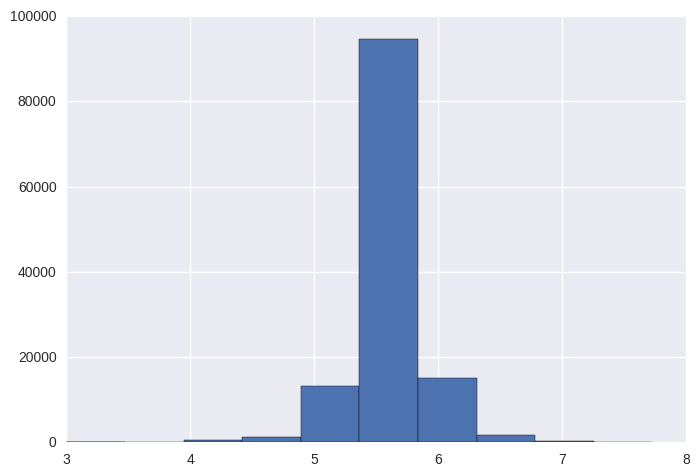

In [33]:
# Built in plotting is available for data frames.  This is an easy (quick & dirty) way to view your data. 
# You can make more elaborate or publication quality graphs by using matplotlib or seaborn directily. 

dataClean['LOG PRICE'].hist()

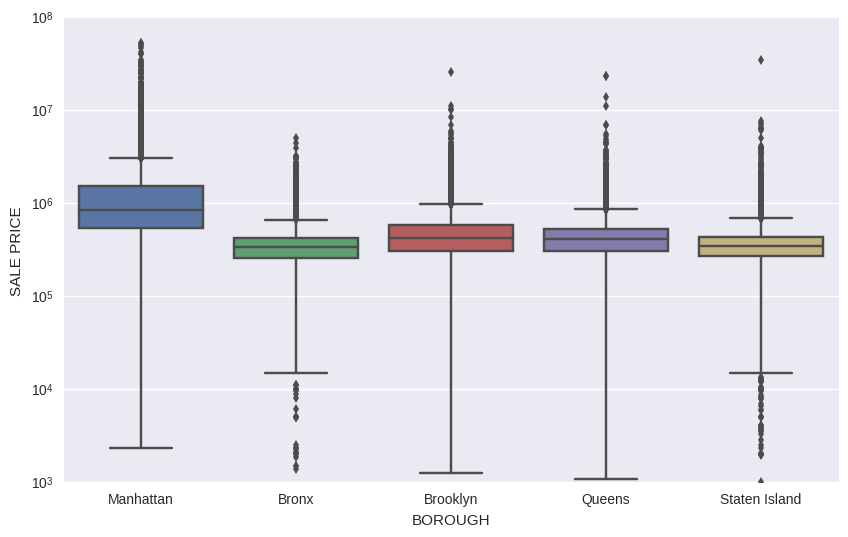

In [34]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw a boxplot with a narrower bandwidth than the default
ax = sns.boxplot(data=dataClean, x='BOROUGH', y='SALE PRICE')
ax.set_yscale("log")
bNames = ['Manhattan','Bronx','Brooklyn','Queens','Staten Island']
ax.set_xticklabels(bNames);

### 3) Grouping and Reshaping Data

In [35]:
# Grouping allows you to apply functions to a group of data.  In this case, let's look at mean price by zipcode. 

grpBorough = dataClean.groupby(by='BOROUGH')
byBorough = grpBorough['SALE PRICE'].describe()
byBorough

BOROUGH       
1        count    1.076900e+04
         mean     1.531227e+06
         std      2.602611e+06
         min      2.314000e+03
         25%      5.450000e+05
         50%      8.555130e+05
         75%      1.553000e+06
         max      5.326832e+07
2        count    7.998000e+03
         mean     3.717019e+05
         std      2.472815e+05
         min      1.406000e+03
         25%      2.600000e+05
         50%      3.400000e+05
         75%      4.246495e+05
         max      5.000000e+06
3        count    2.061100e+04
         mean     5.042755e+05
         std      4.355029e+05
         min      1.250000e+03
         25%      3.100000e+05
         50%      4.250000e+05
         75%      5.794425e+05
         max      2.600000e+07
4        count    5.800200e+04
         mean     4.433395e+05
         std      2.751095e+05
         min      1.080000e+03
         25%      3.100000e+05
         50%      4.115000e+05
         75%      5.309825e+05
         max      2.3514

In [36]:
# Can unstack the data (similar to using some functionality of pivot tables in Excel), Stacking is also 
# available as well as the method pivot_table with allows for full pivot table functionality 

byBorough.unstack(1)

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
1,10769.0,1.531227e+06,2.602611e+06,2314.0,545000.0,855513.0,1553000.0,53268315.0
2,7998.0,3.717019e+05,2.472815e+05,1406.0,260000.0,340000.0,424649.5,5000000.0
3,20611.0,5.042755e+05,4.355029e+05,1250.0,310000.0,425000.0,579442.5,26000000.0
4,58002.0,4.433395e+05,2.751095e+05,1080.0,310000.0,411500.0,530982.5,23514799.0
5,29955.0,3.802487e+05,3.076933e+05,1002.0,269900.0,350000.0,439900.0,35000000.0


### 4) Creating Geographical Maps

#### For reference here is map of NYC with boroughs labeled

<img src="Images/New_York_City_District_Map_2.png",width=500,height=500>

In [37]:
# Plotting mean price on a map of Brooklyn
# Calculating mean price by zipcode

grpZip = dataClean.groupby(by='ZIP CODE')
meanByZip = grpZip['SALE PRICE'].mean()

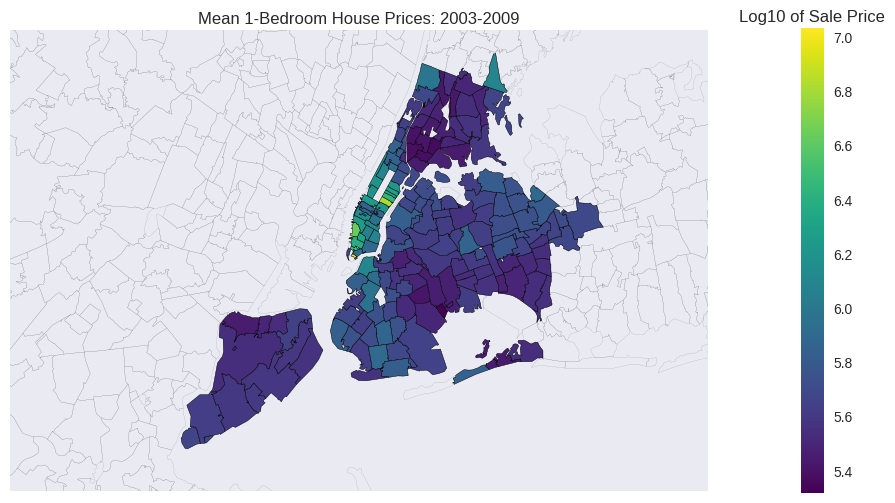

In [39]:
# Plotting the base map
fig, ax2 = plt.subplots(1,1,figsize=(12, 12))
m = Basemap(llcrnrlon=-74.5,llcrnrlat=40.45,urcrnrlon=-73.5,urcrnrlat=40.95,
            projection='lcc',lat_1=39.5,lat_2=41,lon_0=-74)

# Read in the zipcode map shapefile
shp_info = m.readshapefile('Mapfiles/cb_2013_us_zcta510_500k','zipCode',drawbounds= True, linewidth = 0.05)

# Getting a list of zip codes we want to plot
zipcode_list = meanByZip.index.values
zipcode_list = zipcode_list.tolist()

# Setting the colormap
cmap = plt.cm.get_cmap('viridis')  # by default levels 0-256

cindex= []
zipcodes = []

# Calculating the max, min log sale price values, will be used to normalize price to index into colorscale
maxZip = np.float64(meanByZip.values.max())
maxZipLog = np.log10(maxZip)
minZip = np.float64(meanByZip.values.min())
minZipLog = np.log10(minZip)

# Find zipcodes for new shape in shape file
for shapedict in m.zipCode_info:
    # cycle through zipcode
    zipcode = shapedict['ZCTA5CE10']
    zipcodes.append(zipcode)

ax1 = plt.gca() # get current axes instance

# For each shape in shape file, plot polygon segments.  Color is picked by indexing into colormap using
# normalized cost, colormap by default has 256 levels,

for nshape,seg in enumerate(m.zipCode):
    if zipcodes[nshape] in zipcode_list:
        cost = np.log10(meanByZip.loc[zipcodes[nshape]])
        cindex = int(((cost - minZipLog)/(maxZipLog - minZipLog))*257)
        color = cmap(cindex)[:3]
        poly = Polygon(seg,facecolor = color,  edgecolor= 'k')
        ax1.add_patch(poly)
        
plt.title('Mean 1-Bedroom House Prices: 2003-2009')       

# Create a scaled colorbar that gives the range of values

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(np.linspace(minZipLog,maxZipLog,257))
cb = plt.colorbar(sm, shrink=.5, pad = 0.1)
cb.ax.set_title('Log10 of Sale Price');


### 5) Merging Datasets 

In [40]:
# Merging New Data into out DataSet

# Let's load in population and plot that verus mean price per zipcode
# Unlike before, let's specify zip code as a string and not a number.

popData = pd.read_csv('Datafiles/2010Census.csv',dtype = {'Zip Code ZCTA':str})
popData

,Zip Code ZCTA,2010 Census Population
0,01001,16769
1,01002,29049
2,01003,10372
3,01005,5079
4,01007,14649
5,01008,1263
6,01009,741
7,01010,3609
8,01011,1370
9,01012,661


In [41]:
meanbyZip2 =  grpZip.mean()

meanAllbyZip = meanbyZip2.merge(popData,how='inner', left_index='TRUE', right_on='Zip Code ZCTA')
meanAllbyZip

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOG PRICE,Zip Code ZCTA,2010 Census Population
2429,1.0,760.582192,1018.171233,1.0,0.0,1.0,1.879660e+04,1260.931507,941.705479,2.000000,1.346363e+06,6.083775,10001,21102
2430,1.0,324.972332,1097.545455,1.0,0.0,1.0,1.196417e+06,1029.217391,934.992095,1.944664,7.748245e+05,5.763280,10002,81410
2431,1.0,799.913313,1208.767802,1.0,0.0,1.0,5.840758e+04,993.671827,1869.517028,1.962848,1.137345e+06,5.927463,10003,56024
2433,1.0,31.500000,1051.750000,1.0,0.0,1.0,2.505150e+04,1270.500000,1414.750000,2.000000,1.088822e+07,6.414911,10005,7135
2435,1.0,136.788889,1417.488889,1.0,0.0,1.0,1.075419e+04,1952.322222,1925.322222,1.988889,3.023553e+06,6.335238,10007,6988
2436,1.0,390.086957,1035.521739,1.0,0.0,1.0,5.426130e+03,1195.608696,1392.826087,1.978261,1.254626e+06,5.993902,10009,61347
2437,1.0,850.884211,1084.989474,1.0,0.0,1.0,8.120516e+03,1730.073684,1296.305263,1.957895,1.293174e+06,6.029465,10010,31834
2438,1.0,764.975504,1215.481268,1.0,0.0,1.0,1.201342e+04,1358.259366,1827.548991,1.966859,1.803491e+06,6.124592,10011,50984
2439,1.0,499.009756,1129.370732,1.0,0.0,1.0,8.879273e+03,1537.926829,1908.975610,1.980488,2.058087e+06,6.219706,10012,24090
2440,1.0,234.328904,1100.724252,1.0,0.0,1.0,8.293518e+03,2533.953488,1374.249169,1.986711,2.415366e+06,6.234796,10013,27700


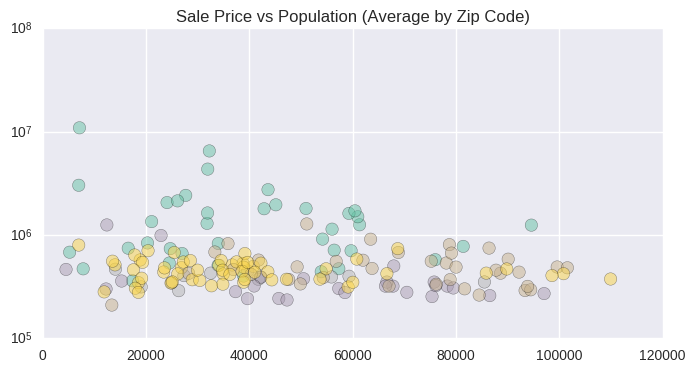

In [42]:
# Can make a scatter plot to see the influence of population on housing prices for the different boroughs

fig, ax = plt.subplots(1,1,figsize=(8, 4))
cmp = plt.cm.get_cmap('Set2',5)

ax.scatter(meanAllbyZip['2010 Census Population'], meanAllbyZip['SALE PRICE'],c = meanAllbyZip['BOROUGH'], 
           s = 80, cmap = cmp,alpha = 0.5)

ax.set_title('Sale Price vs Population (Average by Zip Code)');
ax.set_yscale('log')
ax.set_xlim([0,120000]);

### 6) Working with Time Series Data

In [43]:
# So far we have dealt with our data as if does not have a time component, if we use the date of purchase as the 
# index, we can use our data frame like a timeseries. 

# First, we need to convert our SALE DATA to a datetime 

dataClean['SALE DATE'] = pd.to_datetime(dataClean['SALE DATE'])

# Next, set SALE DATE as our index.  And now we can use the data frame as a time series. 

dataTime = dataClean.set_index(dataClean['SALE DATE'].values)

In [44]:
dataTime

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG PRICE
2004-02-10,3,BATH BEACH,01 ONE FAMILY HOMES,1,6362,17,,A1,57 BAY 11 STREET,11228,...,0,1,2419,1964,1899,1,A1,495000,2004-02-10,5.694605
2004-03-11,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,4,,A5,1643 BENSON AVENUE,11214,...,0,1,1638,972,1930,1,A5,344000,2004-03-11,5.536558
2004-04-09,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,17,,A9,81 BAY 20 STREET,11214,...,0,1,2813,1600,1920,1,A9,475000,2004-04-09,5.676694
2004-10-18,3,BATH BEACH,01 ONE FAMILY HOMES,1,6377,55,,A1,8636 21 AVENUE,11214,...,0,1,4350,2891,1899,1,A1,800000,2004-10-18,5.903090
2004-10-08,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,71,,A5,8668 BAY PARKWAY,11214,...,0,1,1740,1782,1960,1,A5,500000,2004-10-08,5.698970
2004-04-22,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,71,,A5,8668 BAY PARKWAY,11214,...,0,1,1740,1782,1960,1,A5,350500,2004-04-22,5.544688
2004-08-31,3,BATH BEACH,01 ONE FAMILY HOMES,1,6392,115,,A5,145 BAY 7 STREET,11228,...,0,1,1448,1280,1945,1,A5,450000,2004-08-31,5.653213
2004-07-14,3,BATH BEACH,01 ONE FAMILY HOMES,1,6397,63,,A2,132 BAY 13 STREET,11214,...,0,1,2708,730,1910,1,A2,525000,2004-07-14,5.720159
2004-06-21,3,BATH BEACH,01 ONE FAMILY HOMES,1,6429,59,,A5,8810 16 AVENUE,11214,...,0,1,1655,1156,1960,1,A5,380000,2004-06-21,5.579784
2004-06-10,3,BATH BEACH,01 ONE FAMILY HOMES,1,6445,50,,A1,208 BAY 28 STREET,11214,...,0,1,4842,2593,1910,1,A1,880000,2004-06-10,5.944483


In [45]:
# Can now index using a date, or range of dates

dataTime['2004-12-01':'2005-12-01']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG PRICE
2004-12-10,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5930,29,,A4,464 74 STREET,11209,...,0,1,1933,1760,1899,1,A4,731000,2004-12-10,5.863917
2004-12-17,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6000,14,,A5,616 81 STREET,11209,...,0,1,1867,1944,1925,1,A5,610000,2004-12-17,5.785330
2004-12-17,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6005,27,,A1,166 82 STREET,11209,...,0,1,3000,3307,1930,1,A1,960000,2004-12-17,5.982271
2004-12-30,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6015,13,,A1,118 83 STREET,11209,...,0,1,3000,2620,1930,1,A1,900500,2004-12-30,5.954484
2004-12-15,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6072,22,,A5,664 88 STREET,11228,...,0,1,1332,920,1925,1,A5,380000,2004-12-15,5.579784
2004-12-08,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6078,57,,A1,82 89 STREET,11209,...,0,1,6920,5171,1925,1,A1,1250000,2004-12-08,6.096910
2004-12-17,3,BAY RIDGE,01 ONE FAMILY HOMES,1,6093,23,,A5,658 90 STREET,11228,...,0,1,1627,1760,1925,1,A5,515000,2004-12-17,5.711807
2004-12-20,3,BAY RIDGE,02 TWO FAMILY HOMES,1,5951,24,,B1,438 76 STREET,11209,...,0,1,1667,2130,1910,1,B1,257500,2004-12-20,5.410777
2004-12-03,3,BAY RIDGE,04 TAX CLASS 1 CONDOS,1A,6055,1006,,R3,641 88 STREET 1D,11228,...,0,1,8600,1281,0,1,R3,390000,2004-12-03,5.591065
2004-12-15,3,BAY RIDGE,13 CONDOS - ELEVATOR APARTMENTS,2,6135,1011,,R4,9921 4 AVENUE 2E,11209,...,0,1,21937,826,1985,2,R4,200000,2004-12-15,5.301030


In [46]:
# We can also resample (and apply a function to the data in the sample window). In this
# case let's resample every month, and get the mean price.

dataTimebyMonth = dataTime['SALE PRICE'].resample('1m').mean()
dataTimebyMonth[1:10]

2003-02-28    350475
2003-03-31    364636
2003-04-30    354660
2003-05-31    365558
2003-06-30    368760
2003-07-31    366973
2003-08-31    391518
2003-09-30    386732
2003-10-31    385287
Freq: M, Name: SALE PRICE, dtype: int64

In [47]:
# We actually want this divided by borough. So, we can group and then apply our resampling. 

dataCTbyBorough = dataTime.groupby('BOROUGH')

g = lambda x: x.resample('1m').mean()  # define anonymous function to resample each group of data 

# Or could define a regular function ....

def galt(x):
    xresample = x.resample('1m').mean()
    return xresample

# Apply function to each group

#salebyMonth = dataCTbyBorough['SALE PRICE'].apply(galt)

salebyMonth = dataCTbyBorough['SALE PRICE'].apply(g)
salebyMonth = salebyMonth.unstack(0)  # unstack so we have time as the rows and borough as the columns

salebyMonth[1:10]

BOROUGH,1,2,3,4,5
2003-02-28,798726,251265,364785,340456,275234
2003-03-31,1259221,298437,355166,307985,288027
2003-04-30,1008923,245916,351940,312675,326566
2003-05-31,948809,265073,349957,330859,295840
2003-06-30,809091,300249,404086,330593,311313
2003-07-31,745441,304663,381490,348361,313560
2003-08-31,1002184,299163,399887,356689,319986
2003-09-30,837938,271083,421212,358270,323011
2003-10-31,1035133,280022,360615,358931,323883


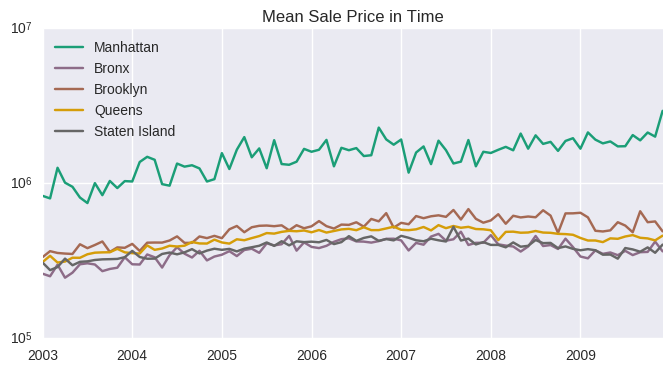

In [48]:
# Plot results, timeseries data frames are supported by the built-in plot method.  
# Note that the build in methods do offer several options for customization. 

f, ax4 = plt.subplots(1,1,figsize=(8, 4))
salebyMonth.plot(ax = ax4, logy = True, title = 'Mean Sale Price in Time', colormap = 'Dark2')
ax4.legend(labels=bNames,loc = 'upper left')

### 7) Modeling Data

In [49]:
# There are many different ways to model this data.  There is clearly a time component. For the sake of 
# simplicity since this demo is focused on showing how to use the functionality and on the getting the BEST model, 
# we are just going to take data from a fixed year (2009)

# Extracting data from 2009
data2009 = dataTime['2009-01-01':'2009-12-31']

In [50]:
# Let's clean out the variables that are constant (Commerical Units, etc) and keep variables that may be of
# importance to our model. For simplicity again, we are going to consider Borough, Zipcode, Land Square Feet, 
# Gross Square Feet

Xtotal = data2009.ix[:,{'BOROUGH','ZIP CODE','GROSS SQUARE FEET','LAND SQUARE FEET'}]
ytotal = data2009.ix[:,{'LOG PRICE'}]

In [51]:
# We need to treat as categorical variables, since even though
# they are numbers, they represent categories and not numbers (i.e. 1 isn't greater than 5 for borough). Pandas
# can let us convert them to dummy variables (convert using onehot encoding). 

XtotalDMY = pd.get_dummies(Xtotal, columns={'BOROUGH','ZIP CODE'})

In [52]:
XtotalDMY

,GROSS SQUARE FEET,LAND SQUARE FEET,ZIP CODE_10001,ZIP CODE_10002,ZIP CODE_10003,ZIP CODE_10005,ZIP CODE_10007,ZIP CODE_10009,ZIP CODE_10010,ZIP CODE_10011,...,ZIP CODE_11436,ZIP CODE_11691,ZIP CODE_11692,ZIP CODE_11693,ZIP CODE_11694,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5
2009-03-16,1188,1768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-06-04,1701,1710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-10-09,2232,2375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-09-17,1681,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-06-12,1920,1887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-08-05,1920,1895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-10-28,1920,1899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-03-30,1742,2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-04-17,1440,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2009-03-25,1778,2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
# Standardize our data. 

scaler = preprocessing.StandardScaler().fit(XtotalDMY)
Xscaled = scaler.transform(XtotalDMY) 

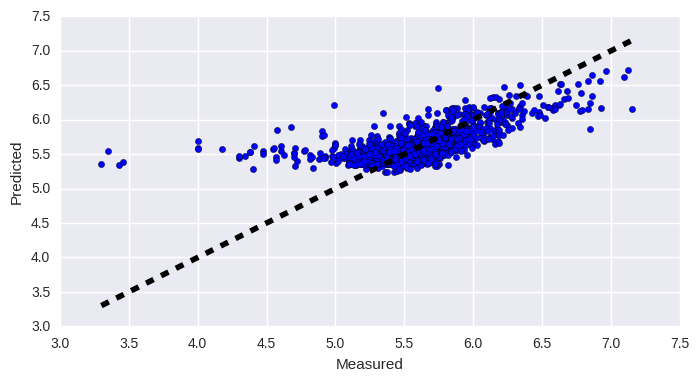

In [54]:
# Fitting the data using linear regression, then plotting the test data vs the predicted values. 

# Create linear regression object
regr = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(Xscaled, ytotal, test_size=0.2, random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
             
f, ax = plt.subplots(1,1,figsize=(8, 4))
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

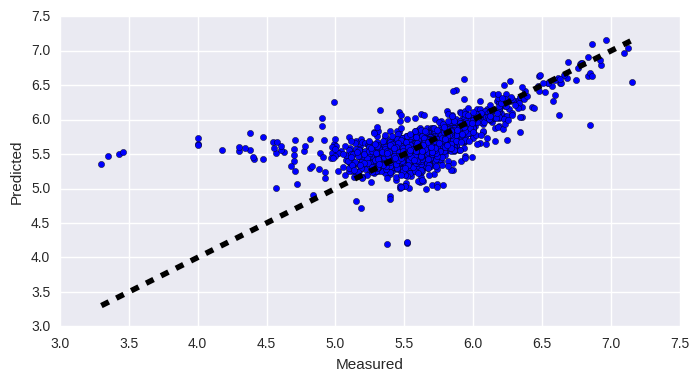

In [55]:
# Fitting the data using random forest, then plotting the test data vs the predicted values. In
# this case we are using defaults for our random forest, but there is a nice example on how to tweak
# the values for best performace for your particular data here--
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

regr_rf = RandomForestRegressor() 
regr_rf.fit(X_train, y_train.values.ravel())

# Predict on new data
predicted_rf = regr_rf.predict(X_test)

f, ax = plt.subplots(1,1,figsize=(8, 4))
ax.scatter(y_test, predicted_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')